<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#What-is-correlation?" data-toc-modified-id="What-is-correlation?-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>What is correlation?</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Import-data" data-toc-modified-id="Import-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Import data</a></span></li><li><span><a href="#Compute-correlation" data-toc-modified-id="Compute-correlation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Compute correlation</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

**What?** Correlation

</font>
</div>

# What is correlation?
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-info">
<font color=black>

- Correlation measures association, but doesn't show if x causes y or vice versa
- Correlation is a statistic that measures the degree to which two variables move in relation to each other.
- **How is it used in finance?** It is used to quantify the movement of a stock with that of a benchmark index, such as the S&P 500.

</font>
</div>

# Imports
<hr style = "border:2px solid black" ></hr>

In [1]:
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

# Import data
<hr style = "border:2px solid black" ></hr>

In [2]:
tickers = ['AAPL', 'TWTR', 'IBM', 'MSFT']
start = dt.datetime(2020, 1, 1)

data = pdr.get_data_yahoo(tickers, start)

In [3]:
data.head()

Attributes  Adj Close                                         Close  \
Symbols          AAPL       TWTR         IBM        MSFT       AAPL   
Date                                                                  
2020-01-02  73.683563  32.299999  112.916931  156.591995  75.087502   
2020-01-03  72.967216  31.520000  112.016411  154.642151  74.357498   
2020-01-06  73.548622  31.639999  111.816284  155.041901  74.949997   
2020-01-07  73.202721  32.540001  111.891319  153.628250  74.597504   
2020-01-08  74.380295  33.049999  112.825203  156.075272  75.797501   

Attributes                                          High             ...  \
Symbols          TWTR         IBM        MSFT       AAPL       TWTR  ...   
Date                                                                 ...   
2020-01-02  32.299999  129.464630  160.619995  75.150002  32.500000  ...   
2020-01-03  31.520000  128.432129  158.619995  75.144997  32.099998  ...   
2020-01-06  31.639999  128.202682  159.029999  74.989998  31.709999  ...   
2020-01-07  32.540001  128.288712  157.580002  75.224998  32.700001  ...   
2020-01-08  33.049999  129.359467  160.089996  76.110001  33.400002  ...   

Attributes         Low                   Open                         \
Symbols            IBM        MSFT       AAPL       TWTR         IBM   
Date                                                                   
2020-01-02  128.843216  158.330002  74.059998  32.310001  129.063095   
2020-01-03  127.686424  158.059998  74.287498  31.709999  127.695984   
2020-01-06  127.342255  156.509995  73.447502  31.230000  127.552582   
2020-01-07  127.533463  157.320007  74.959999  31.799999  127.810707   
2020-01-08  128.030594  157.949997  74.290001  32.349998  128.594650   

Attributes                   Volume                                     
Symbols           MSFT         AAPL        TWTR        IBM        MSFT  
Date                                                                    
2020-01-02  158.779999  135480400.0  10721100.0  3293436.0  22622100.0  
2020-01-03  158.320007  146322800.0  14429500.0  2482890.0  21116200.0  
2020-01-06  157.080002  118387200.0  12582500.0  2537073.0  20813700.0  
2020-01-07  159.320007  108872000.0  13712900.0  3232977.0  21634100.0  
2020-01-08  158.929993  132079200.0  14632400.0  4545916.0  27746500.0  

[5 rows x 24 columns]

In [4]:
data = data['Adj Close']

In [5]:
data.head()

Symbols,AAPL,TWTR,IBM,MSFT
Date,,,,
2020-01-02,73.683563,32.299999,112.916931,156.591995
2020-01-03,72.967216,31.520000,112.016411,154.642151
2020-01-06,73.548622,31.639999,111.816284,155.041901
2020-01-07,73.202721,32.540001,111.891319,153.628250
2020-01-08,74.380295,33.049999,112.825203,156.075272


<div class="alert alert-info">
<font color=black>

- Calculate the log returns.
-  Remember we do it on the log returns to keep different stock index on the same range.

</font>
</div>

In [6]:
log_returns = np.log(data/data.shift())

In [7]:
log_returns

Symbols,AAPL,TWTR,IBM,MSFT
Date,,,,
2020-01-02,NaN,NaN,NaN,NaN
2020-01-03,-0.009770,-0.024445,-0.008007,-0.012530
2020-01-06,0.007936,0.003800,-0.001788,0.002582
2020-01-07,-0.004714,0.028048,0.000671,-0.009160
2020-01-08,0.015958,0.015551,0.008312,0.015803
...,...,...,...,...
2022-08-25,0.014812,0.006354,0.005614,0.011034
2022-08-26,-0.038428,-0.014477,-0.027237,-0.039351
2022-08-29,-0.013785,-0.010435,-0.000537,-0.010725


In [8]:
log_returns.corr()

Symbols,AAPL,TWTR,IBM,MSFT
Symbols,,,,
AAPL,1.000000,0.463551,0.442805,0.813311
TWTR,0.463551,1.000000,0.267531,0.475028
IBM,0.442805,0.267531,1.000000,0.464707
MSFT,0.813311,0.475028,0.464707,1.000000


<div class="alert alert-info">
<font color=black>

- Correlation on the diagonal is always1.0. This is obvious, since the diagonal shows the correlation between itself (AAPL and AAPL, and so forth).

- Other than that, we can conclude that AAPL and MSFT are correlated the most.

- Let’s add the S&P 500 to our DataFrame. This is done because the performance is generally benchmarked against this large agglomerate of best 500 performants.

</font>
</div>

In [9]:
sp500 = pdr.get_data_yahoo("^GSPC", start)

In [10]:
log_returns['SP500'] = np.log(sp500['Adj Close']/sp500['Adj Close'].shift())

In [11]:
log_returns.corr()

Symbols,AAPL,TWTR,IBM,MSFT,SP500
Symbols,,,,,
AAPL,1.000000,0.463551,0.442805,0.813311,0.821531
TWTR,0.463551,1.000000,0.267531,0.475028,0.525389
IBM,0.442805,0.267531,1.000000,0.464707,0.674009
MSFT,0.813311,0.475028,0.464707,1.000000,0.857431
SP500,0.821531,0.525389,0.674009,0.857431,1.000000


<div class="alert alert-info">
<font color=black>

- AAPL and MSFT are mostly correlated to S&P 500 index. 
- This is not surprising, as they are a big part of the weight of the market cap in the index.

</font>
</div>

# Compute correlation
<hr style = "border:2px solid black" ></hr>

In [12]:
def test_correlation(ticker):
    df = pdr.get_data_yahoo(ticker, start)
    lr = log_returns.copy()
    lr[ticker] = np.log(df['Adj Close']/df['Adj Close'].shift())
    return lr.corr()

In [13]:
def visualize_correlation(ticker1, ticker2):
    df = pdr.get_data_yahoo([ticker1, ticker2], start)
    df = df['Adj Close']
    df = df/df.iloc[0]
    fig, ax = plt.subplots()
    df.plot(ax=ax)

In [14]:
test_correlation("LQD")

Symbols,AAPL,TWTR,IBM,MSFT,SP500,LQD
Symbols,,,,,,
AAPL,1.000000,0.463551,0.442805,0.813311,0.821531,0.273205
TWTR,0.463551,1.000000,0.267531,0.475028,0.525389,0.221194
IBM,0.442805,0.267531,1.000000,0.464707,0.674009,0.214463
MSFT,0.813311,0.475028,0.464707,1.000000,0.857431,0.294260
SP500,0.821531,0.525389,0.674009,0.857431,1.000000,0.326227
LQD,0.273205,0.221194,0.214463,0.294260,0.326227,1.000000


In [15]:
test_correlation("TLT")

Symbols,AAPL,TWTR,IBM,MSFT,SP500,TLT
Symbols,,,,,,
AAPL,1.000000,0.463551,0.442805,0.813311,0.821531,-0.206812
TWTR,0.463551,1.000000,0.267531,0.475028,0.525389,-0.111731
IBM,0.442805,0.267531,1.000000,0.464707,0.674009,-0.315395
MSFT,0.813311,0.475028,0.464707,1.000000,0.857431,-0.187286
SP500,0.821531,0.525389,0.674009,0.857431,1.000000,-0.306724
TLT,-0.206812,-0.111731,-0.315395,-0.187286,-0.306724,1.000000


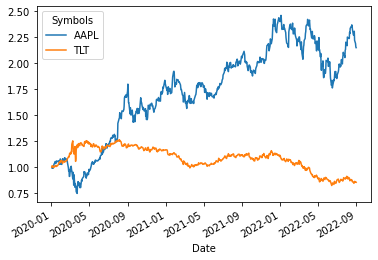

In [16]:
visualize_correlation("AAPL", "TLT")

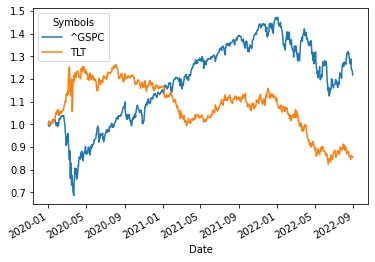

In [17]:
visualize_correlation("^GSPC", "TLT")

# References
<hr style = "border:2px solid black" ></hr>

<div class="alert alert-warning">
<font color=black>

- [GitHub code](https://github.com/LearnPythonWithRune/PythonForFinanceRiskAndReturn/blob/main/05%20-%20Correlation.ipynb)
- [Blog article](https://www.learnpythonwithrune.org/python-for-finance-risk-and-return/#lesson-5)
- Correlation https://www.investopedia.com/terms/c/correlation.asp
- SP500 by Market Cap https://www.slickcharts.com/sp500

</font>
</div>                 